In [13]:
# ✅ Task 0 — Setup (Qiskit 1.x compatible)

!pip install qiskit qiskit-aer qiskit-ibm-runtime --quiet

# --- Imports ---
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error

import matplotlib.pyplot as plt

# Create a single simulator instance for reuse
sim = AerSimulator()

print("✅ Qiskit 1.x setup complete and simulator ready!")


✅ Qiskit 1.x setup complete and simulator ready!


In [22]:
# 🧩 TASK 1 — Modify the Oracle (Deutsch–Jozsa Algorithm)
# =========================================================

# ✅ Step 1: Install dependencies (run once)
!pip install qiskit --quiet

# ✅ Step 2: Import required modules
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

# =========================================================
# 🔹 Create a custom balanced oracle:
# This oracle flips the ancilla for HALF of all possible inputs.
# For example, when the first input qubit is |1>, ancilla is flipped.
# =========================================================
def balanced_oracle_half(qc, input_qubits, ancilla):
    # Flip ancilla when the first input qubit is 1
    qc.cx(input_qubits[0], ancilla)

# =========================================================
# 🔹 Deutsch–Jozsa Algorithm Implementation
# =========================================================
def deutsch_jozsa_run(n, oracle_func):
    qc = QuantumCircuit(n + 1, n)
    input_qubits = list(range(n))
    ancilla = n

    # 1️⃣ Initialize ancilla to |1⟩
    qc.x(ancilla)
    qc.barrier()

    # 2️⃣ Apply Hadamard to all qubits
    qc.h(range(n + 1))
    qc.barrier()

    # 3️⃣ Apply custom balanced oracle
    oracle_func(qc, input_qubits, ancilla)
    qc.barrier()

    # 4️⃣ Apply Hadamard to input qubits again
    qc.h(input_qubits)
    qc.barrier()

    # 5️⃣ Measure input qubits
    qc.measure(input_qubits, range(n))
    return qc

# =========================================================
# 🔹 Step 3: Create circuit for n=3 input qubits
# =========================================================
n = 3
qc = deutsch_jozsa_run(n, balanced_oracle_half)

# ✅ Draw the circuit (text fallback so it always works)
qc.draw('text')


░ ┌───┐ ░       ░ ┌───┐ ░ ┌─┐      
q_0: ──────░─┤ H ├─░───■───░─┤ H ├─░─┤M├──────
           ░ ├───┤ ░   │   ░ ├───┤ ░ └╥┘┌─┐   
q_1: ──────░─┤ H ├─░───┼───░─┤ H ├─░──╫─┤M├───
           ░ ├───┤ ░   │   ░ ├───┤ ░  ║ └╥┘┌─┐
q_2: ──────░─┤ H ├─░───┼───░─┤ H ├─░──╫──╫─┤M├
     ┌───┐ ░ ├───┤ ░ ┌─┴─┐ ░ └───┘ ░  ║  ║ └╥┘
q_3: ┤ X ├─░─┤ H ├─░─┤ X ├─░───────░──╫──╫──╫─
     └───┘ ░ └───┘ ░ └───┘ ░       ░  ║  ║  ║ 
c: 3/═════════════════════════════════╩══╩══╩═
                                      0  1  2

In [23]:
# ⚙️ Task 2 — Run Deutsch–Jozsa for n = 2, 4, 5

for n in [2, 4, 5]:
    qc = deutsch_jozsa_run(n, balanced_oracle_msb)
    tqc = transpile(qc, sim)
    result = sim.run(tqc, shots=1024).result()
    counts = result.get_counts()
    print(f"n = {n}")
    print("Circuit depth:", tqc.depth())
    print("Measurement results:", counts)
    print("-" * 50)


n = 2
Circuit depth: 5
Measurement results: {'01': 1024}
--------------------------------------------------
n = 4
Circuit depth: 5
Measurement results: {'0001': 1024}
--------------------------------------------------
n = 5
Circuit depth: 5
Measurement results: {'00001': 1024}
--------------------------------------------------


🟩 Ideal results: {'0001': 1024}
🟥 Noisy results: {'1001': 2, '0101': 6, '0011': 2, '0010': 1, '0000': 9, '0001': 1004}


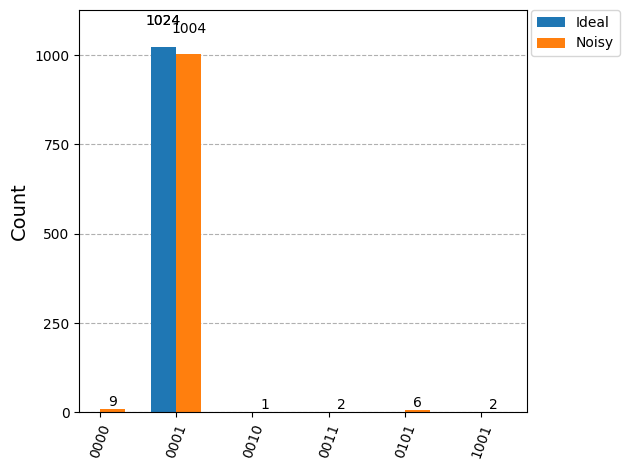

In [24]:
# 📈 Task 3 — Simulate with and without noise

n = 4
qc = deutsch_jozsa_run(n, balanced_oracle_msb)

# Noise model
noise_model = NoiseModel()
p1 = 0.002  # single-qubit error
p2 = 0.01   # two-qubit error
noise_model.add_all_qubit_quantum_error(depolarizing_error(p1, 1), ['h', 'x'])
noise_model.add_all_qubit_quantum_error(depolarizing_error(p2, 2), ['cx'])

# Ideal
ideal_counts = sim.run(transpile(qc, sim), shots=1024).result().get_counts()

# Noisy
noisy_sim = AerSimulator(noise_model=noise_model)
noisy_counts = noisy_sim.run(transpile(qc, noisy_sim), shots=1024).result().get_counts()

print("🟩 Ideal results:", ideal_counts)
print("🟥 Noisy results:", noisy_counts)
plot_histogram([ideal_counts, noisy_counts], legend=["Ideal", "Noisy"])


In [31]:
!pip install qiskit qiskit-aer --quiet


In [32]:
import qiskit_aer
print("Qiskit Aer imported successfully!")


Qiskit Aer imported successfully!


In [33]:
from qiskit_aer import AerSimulator


In [34]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# --- Task 4: Deutsch–Jozsa Algorithm (Local Simulation Version) ---

def balanced_oracle(qc, qubits, ancilla):
    qc.cx(qubits[0], ancilla)
    qc.cx(qubits[1], ancilla)

def deutsch_jozsa(num_qubits, oracle_func):
    qc = QuantumCircuit(num_qubits + 1, num_qubits)
    qc.x(num_qubits)
    qc.barrier()

    for q in range(num_qubits + 1):
        qc.h(q)
    qc.barrier()

    oracle_func(qc, range(num_qubits), num_qubits)
    qc.barrier()

    for q in range(num_qubits):
        qc.h(q)
    qc.measure(range(num_qubits), range(num_qubits))
    return qc

num_qubits = 2
qc = deutsch_jozsa(num_qubits, balanced_oracle)
qc.draw('text')

simulator = AerSimulator()
compiled = transpile(qc, simulator)
result = simulator.run(compiled).result()
counts = result.get_counts()

print("Measurement Results:", counts)
plot_histogram(counts)
plt.show()


Measurement Results: {'11': 1024}


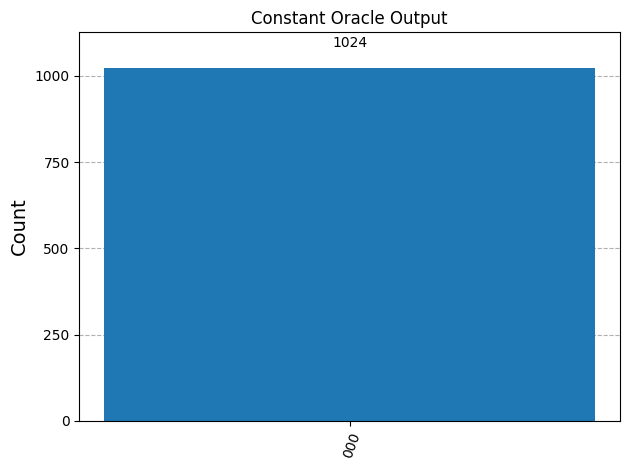

In [18]:
# ✅ Extra — Constant Oracle Example (f(x)=0)

def constant_oracle(qc, input_qubits, ancilla):
    """Does nothing — constant output (f(x)=0)."""
    pass  # ancilla never flipped

qc_const = deutsch_jozsa_run(3, constant_oracle)
result_const = sim.run(transpile(qc_const, sim), shots=1024).result()
plot_histogram(result_const.get_counts(), title="Constant Oracle Output")
